In [8]:
import celltypist
from celltypist import models
import scanpy as sc
import pandas as pd 
import numpy as np
import anndata
import re
import h5py
import scipy.sparse as scs
import concurrent.futures
import scanpy.external as sce
import gc
import harmonypy
from concurrent.futures import ThreadPoolExecutor

In [9]:
adata = sc.read_h5ad('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Object_generation/IL1B_CD14_Mono_ONLY_FluYr1D0_certpro_processed_05152024.h5ad')

In [10]:
adata.obs.columns

Index(['barcodes', 'original_barcodes', 'cell_name', 'batch_id', 'pool_id',
       'chip_id', 'well_id', 'n_genes', 'n_reads', 'n_umis',
       'total_counts_mito', 'pct_counts_mito', 'doublet_score',
       'predicted_AIFI_L1', 'AIFI_L1_score', 'AIFI_L1', 'predicted_AIFI_L2',
       'AIFI_L2_score', 'AIFI_L2', 'predicted_AIFI_L3', 'AIFI_L3_score',
       'AIFI_L3', 'sample.sampleKitGuid', 'cohort.cohortGuid',
       'subject.subjectGuid', 'subject.biologicalSex', 'subject.cmv',
       'subject.bmi', 'subject.race', 'subject.ethnicity', 'subject.birthYear',
       'subject.ageAtFirstDraw', 'sample.visitName', 'sample.drawDate',
       'sample.subjectAgeAtDraw', 'specimen.specimenGuid', 'pipeline.fileGuid',
       'leiden_resolution_0.5', 'leiden_resolution_1', 'leiden_resolution_1.5',
       'leiden_resolution_2'],
      dtype='object')

In [11]:
#CD14_naive_subset = adata_subset[adata_subset.obs['labeled_lv2'].isin(['CD14 mono'])]

In [12]:
adata=adata.raw.to_adata()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.tl.rank_genes_groups(adata, 'leiden_resolution_0.5', method='wilcoxon')

df_resolution_1=sc.get.rank_genes_groups_df(adata,group=None)
df_resolution_1.to_csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Object_generation/top30_DEG_res0.5_IL1B_CD14_mono_cluster_certpro.csv')

#sc.tl.rank_genes_groups(adata_subset, 'leiden_resolution_1.5', method='wilcoxon')
#df_resolution_1_5=sc.get.rank_genes_groups_df(adata_subset,group=None)
#df_resolution_1_5.to_csv('/home/jupyter/Myeloid_cells/files/CD14_res1.csv')

#sc.tl.rank_genes_groups(adata_subset, 'leiden_resolution_2', method='wilcoxon')
#df_resolution_2=sc.get.rank_genes_groups_df(adata_subset,group=None)
#df_resolution_2.to_csv('/home/jupyter/Myeloid_cells/files/Cluster_46_res2.csv')

#sc.tl.rank_genes_groups(adata_subset, 'leiden_resolution_3', method='wilcoxon')
#df_resolution_2=sc.get.rank_genes_groups_df(adata_subset,group=None)
#df_resolution_2.to_csv('/home/jupyter/Myeloid_cells/files/Cluster_46_res3.csv')

# DEG Plot generation

In [13]:
df=pd.read_csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Object_generation/top30_DEG_res0.5_IL1B_CD14_mono_cluster_certpro.csv')

In [14]:
df=df.groupby('group').head(30).reset_index(drop=True)

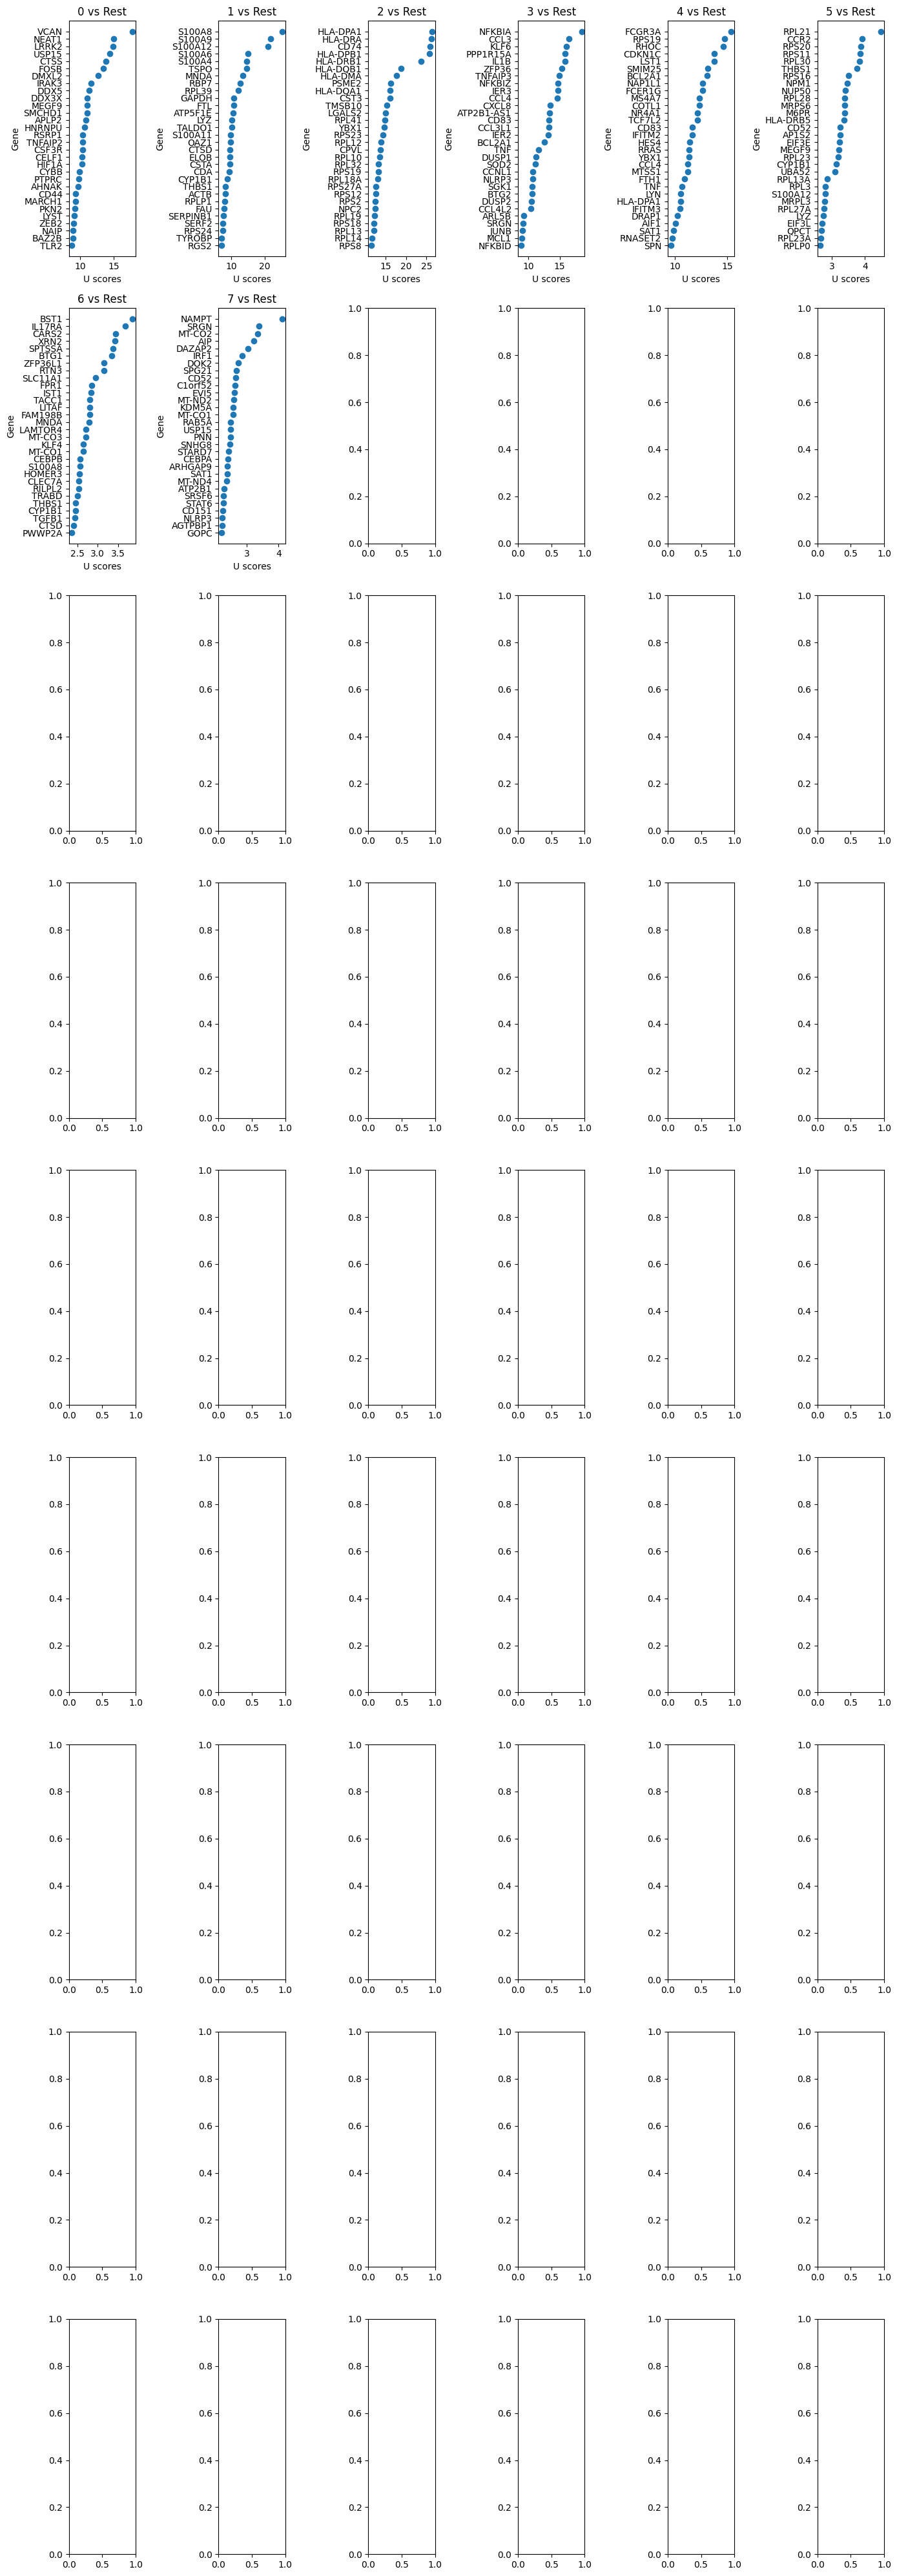

In [15]:


import matplotlib.pyplot as plt

groups = df.groupby('group')

fig, axs = plt.subplots(9, 6, figsize=(14, 40), squeeze=False)

# Loop through each group and create a scatter plot in the corresponding subplot
for i, (name, group) in enumerate(groups):
    row, col = i // 6, i % 6
    axs[row, col].scatter(group['scores'], group['names'])
    axs[row, col].invert_yaxis()
    axs[row, col].set_title(str(name)+" vs Rest")
    axs[row, col].set_xlabel('U scores')
    axs[row, col].set_ylabel('Gene')
fig.tight_layout()
plt.savefig('scatter_plot.png')